In [58]:
%matplotlib inline

# Section 1: Creating a graph, adding/deleting Nodes and vertices

In [59]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import igraph as ig
import matplotlib.pyplot as plt

In [61]:
g = ig.Graph()

In [62]:
# To make a graph with 10 nodes (numbered 0 to 9) and two edges connecting nodes 0-1 and 0-5
g = ig.Graph(n=10, edges=[[0, 1], [0, 5]])

In [63]:
print(g)

IGRAPH U--- 10 2 --
+ edges:
0--1 0--5


In [64]:
g.add_vertices(3)

In [65]:
g.add_edges([(0, 1), (1, 2)])

In [66]:
print(g)

IGRAPH U--- 13 4 --
+ edges:
0--1 0--5 0--1 1--2


In [67]:
layout = g.layout_kamada_kawai()
layout = g.layout("kamada_kawai")

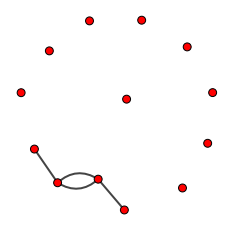

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax)

In [69]:
g.get_eid(0, 5)

1

In [70]:
g.delete_edges(1)

In [71]:
print(g)

IGRAPH U--- 13 3 --
+ edges:
0--1 0--1 1--2


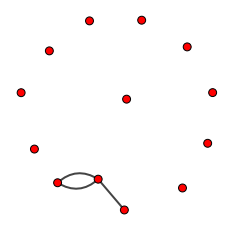

In [72]:
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax)

# Section2: Generating graphs

In [73]:
g = ig.Graph.Tree(127, 2) #Graph.Tree() to generate a regular tree graph with 127 vertices, each vertex having two children 

In [74]:
summary(g)

IGRAPH U--- 127 126 -- 


In [75]:
g2 = ig.Graph.Tree(127, 2)

In [76]:
summary(g2)

IGRAPH U--- 127 126 -- 


In [77]:
g2.get_edgelist() == g.get_edgelist()

True

In [78]:
g2.get_edgelist()[:10] #get_edgelist() method, which returns a list of source and target vertices for all edges, sorted by edge ID

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (2, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10)]

In [79]:
 g = ig.Graph.GRG(100, 0.2) #This generates a geometric random graph: n points are chosen randomly and uniformly 
 #inside the unit square and pairs of points closer to each other than a predefined distance d are connected by an edge.

In [80]:
summary(g)

IGRAPH U--- 100 493 -- 
+ attr: x (v), y (v)


In [81]:
g2 = ig.Graph.GRG(100, 0.2)

In [82]:
summary(g2)

IGRAPH U--- 100 547 -- 
+ attr: x (v), y (v)


In [83]:
g.get_edgelist() == g2.get_edgelist()

False

# Section 3: Setting and retrieving attributes

In [84]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

In [85]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]



#Graph.vs and Graph.es are the standard way to obtain a sequence of all vertices and edges, respectively.
 #Just like a Python dictionary, we can set each property using square brackets. 
 #The value must be a list with the same length as the vertices (for Graph.vs) or edges (for Graph.es). 
 #This assigns an attribute to all vertices/edges at once. 

In [86]:
g.es[0]["is_formal"] = True

## Section 3.1: Querying vertices and edges based on attributes

In [87]:
g.vs.select(_degree=g.maxdegree())["name"]

['Claire']

In [88]:
g.vs.select(age_lt=30)["name"]

['Alice', 'Claire', 'Esther', 'Frank']

In [89]:
g.vs.find(name="Claire").index

2

In [90]:
g.degree("Dennis")

3

In [91]:
g.get_adjacency()

Matrix([[0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0]])

## Section 3.2: layouting and plotting

In [92]:
layout = g.layout_kamada_kawai()
layout = g.layout("kamada_kawai")

In [93]:
g.vs["label"] = g.vs["name"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
ig.plot(g, layout=layout, bbox=(300, 300), margin=20, target=ax) 

In [94]:
print(ig.plot(g, layout=layout, bbox=(300, 300), margin=20, target=ax) )

AxesSubplot(0.258602,0.125;0.507797x0.755)


In [95]:
ig.plot(g, layout=layout, bbox=(300, 300), margin=20, target=ax)

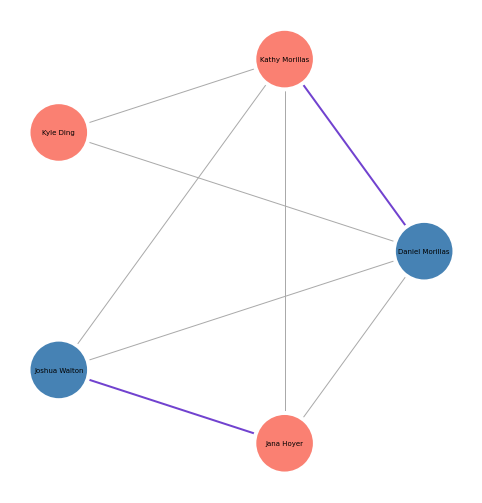

/usr/local/lib/python3.8/dist-packages/igraph/io/files.py:494: RuntimeWarning: The boolean edge attribute 'married' was converted to numeric. at src/io/gml.c:1281
  return writer(f, *args, **kwds)


In [103]:
import igraph as ig
import matplotlib.pyplot as plt

# Construct a graph with 5 vertices
n_vertices = 5
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]
g = ig.Graph(n_vertices, edges)

# Set attributes for the graph, nodes, and edges
g["title"] = "Small Social Network"
g.vs["name"] = ["Daniel Morillas", "Kathy Archer", "Kyle Ding", "Joshua Walton", "Jana Hoyer"]
g.vs["gender"] = ["M", "F", "F", "M", "F"]
g.es["married"] = [False, False, False, False, False, False, False, True]

# Set individual attributes
g.vs[1]["name"] = "Kathy Morillas"
g.es[0]["married"] = True

# Plot in matplotlib
# Note that attributes can be set globally (e.g. vertex_size), or set individually using arrays (e.g. vertex_color)
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.3,
    vertex_color=["steelblue" if gender == "M" else "salmon" for gender in g.vs["gender"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=7.0,
    edge_width=[2 if married else 1 for married in g.es["married"]],
    edge_color=["#7142cf" if married else "#AAA" for married in g.es["married"]]
)

plt.show()

# Save the graph as an image file
fig.savefig('social_network.png')
fig.savefig('social_network.jpg')
fig.savefig('social_network.pdf')

# Export and import a graph as a GML file.
g.save("social_network.gml")
g = ig.load("social_network.gml")

# Section4: Graph Generation

In [105]:
from igraph import Graph

In [106]:
g = Graph.Adjacency([[0, 1, 1], [0, 0, 0], [0, 0, 1]])

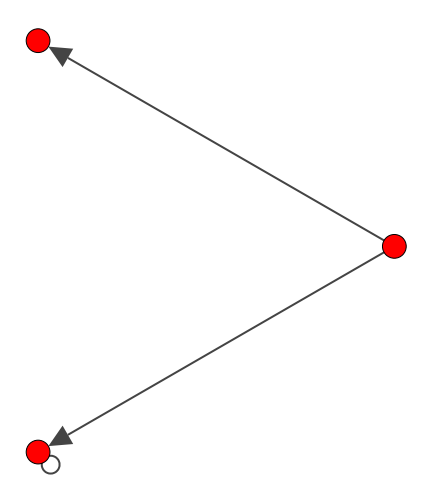

In [107]:
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1)

In [108]:
print(g)

IGRAPH D--- 3 3 --
+ edges:
0->1 0->2 2->2


In [109]:
g = Graph.Formula('D-A:B:F:G, A-C-F-A, B-E-G-B, A-B, F-G, H-F:G, H-I-J')

In [110]:
print(g)

IGRAPH UN-- 10 16 --
+ attr: name (v)
+ edges (vertex names):
D -- A, B, F, G      F -- D, A, G, C, H   E -- B, G            J -- I
A -- D, B, F, C      G -- D, B, F, E, H   H -- F, G, I
B -- D, A, G, E      C -- A, F            I -- H, J


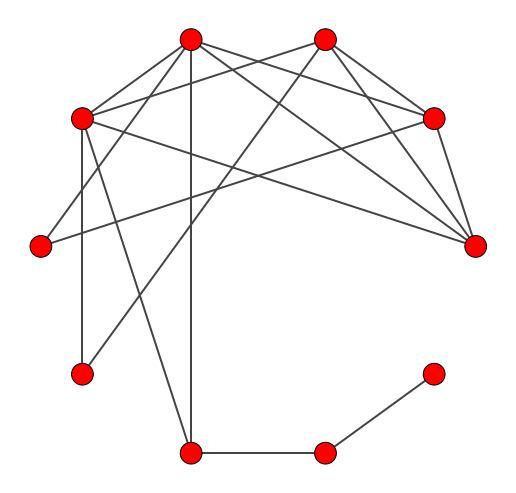

In [111]:
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1)

In [112]:
g = Graph.Full(n=3, directed=True, loops=True)

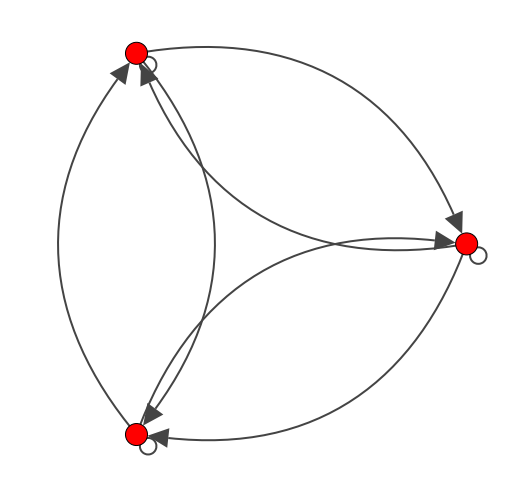

In [113]:
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1)

In [114]:
 g = Graph.Atlas(44) #The book ‘An Atlas of Graphs’ by Roland C. Read and Robin J. Wilson contains all unlabeled undirected graphs with up to seven vertices,
 # numbered from 0 up to 1252. You can create any graph from this list by index with Graph.Atlas()

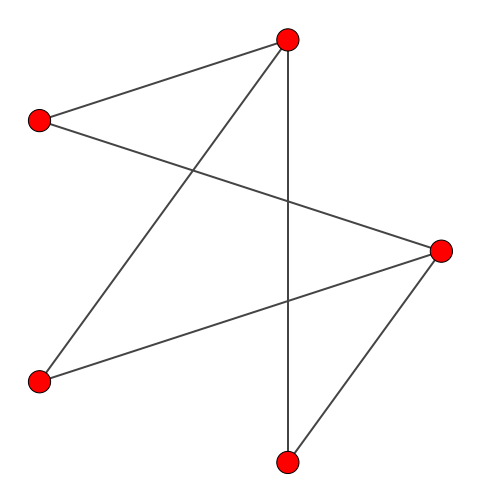

In [115]:
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1)

In [116]:
 g = Graph.Famous('Zachary')

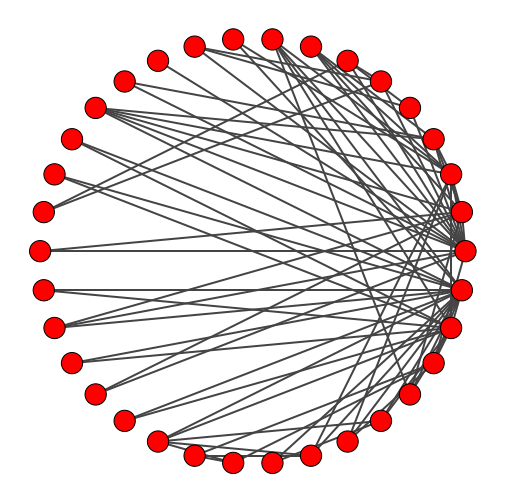

In [117]:
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1)

In [119]:
g = Graph.Barabasi(10)

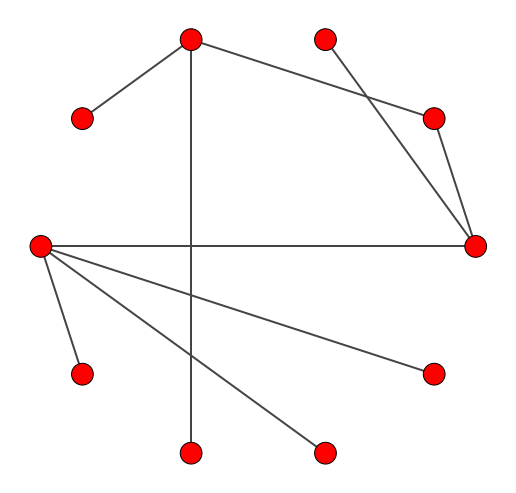

In [120]:
fig, ax = plt.subplots(figsize=(9,9))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1)